In [1]:
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.8.8


# COMENTARIOS SOBRE O TRABALHO

#### Com base no conjunto de dados extraidos do _dataset_ [house sales prediction](https://www.kaggle.com/harlfoxem/housesalesprediction) do _[kaggle](https://www.kaggle.com/)_, a ideia é encontrar boas oportunidades de negocio na compra e venda de imoveis. Para isso, será necessario responder algumas questões:


- Quais casas deveria comprar e por qual preço de compra?
- Uma vez a casa comprada, qual o melhor momento para vendê-las e qual seria o preço da venda?
- Deveria fazer uma reforma para aumentar o preço da venda? Quais seriam as sugestões de mudanças? Qual o incremento no preço dado por cada opção de reforma?

#### Para a solução do problema, uma sugestão de roteiro seria:
    1. Identifique a causa raíz.
    2. Questione o motivo das perguntas feitas e faça novas perguntas tentando entender o real motivo dessa ação
    3. Colete os dados ( Os dados estão no link acima )
    4. Aplique uma limpeza nos dados.
    5. Entenda as variáveis disponíveis, possíveis valores faltantes, faça uma estatística descritiva para entender as características dos dados.
    6. Levante Hipóteses sobre o Comportamento do Negócio.
    7. Casas com garagens são mais caras? Porque?
    8. Casas com muitos quartos são mais caras? Porque? A partir de quantos quartos o preço aumenta? Qual o incremento de preço por cada quarto adicionado?
    9. As casas mais caras estão no centro? Qual a região? Existe alguma coisa na região que tem correlação com valor de venda da casa? Shoppings? Montanhas? Pessoas Famosas?
    10. Faça uma ótima Análise Exploratória de Dados.
    11. Quais hipóteses são falsas e quais são verdadeiras?
    12. Escreve os Insights que você encontrou
    13. Escreve possíveis soluções para o problema.


## Legenda dos dados
- id- numero de identificação.
- date - data de venda do imovel
- price - preço de venda do imovel.
- bedrooms - quartos.
- bathrooms - banheiros.
- sqft_living - area em pés quadrados da casa.
- sqft_lot - area em pés quadrados do terreno.
- sqft_above - area em pés quadrados do soltão.
- sqft_basement - area em pés quadrados do porão
- floors - pisos/andadres
- waterfront - região de praia. obs: esse campo possui valores logicos, **0** é **False** e **1** é **True**.
- view - vista: porem não consigo entender o que essa informação significa
- condition - condição: porem não consigo entender o que essa informação significa
- grade - é uma classificação das casas, que varia de **1** à **13**
- yr_built - ano de construção
- yr_renovate - ano de reforma
- zipcode - algo como um cep nos estados unidos
- long - longitude da localização do imovel
- lat - latitude da localização do imovel


### IMPORTANTE!!!!!!
#### Note que na sugestão de roteiro é questionado se casas com garagens são mais valorizadas, porém a legenda não apresenta variavel que determine se a casa tem garagem ou não. 
obs: _Este Markdowm está sendo escrito após já ter explorado os dados, apenas foi colocado no inicio por questão de organização do notebook_

In [2]:
#Celula usada para importar os pacotes necessarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Primeiros Insigths
- Iremos inciar a solução do problema explorando os dados, observando medias, medianas e desvios padrões.

- Isso será necesario para entender bem a base de dados com que estamos trabalhando. Após esse momento podemos limpar os dados retirando informações desnecessarias e manipula-los de acordo com a necessidade pra solucionar o problema.

In [3]:
HouseData= pd.read_csv('./kc_house_data.csv')

In [4]:
HouseData.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
print(HouseData)

               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242   

In [6]:
corel = HouseData.corr()

In [7]:
print(corel)

                     id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016762  0.001286   0.005160    -0.012258 -0.132109   
price         -0.016762  1.000000  0.308350   0.525138     0.702035  0.089661   
bedrooms       0.001286  0.308350  1.000000   0.515884     0.576671  0.031703   
bathrooms      0.005160  0.525138  0.515884   1.000000     0.754665  0.087740   
sqft_living   -0.012258  0.702035  0.576671   0.754665     1.000000  0.172826   
sqft_lot      -0.132109  0.089661  0.031703   0.087740     0.172826  1.000000   
floors         0.018525  0.256794  0.175429   0.500653     0.353949 -0.005201   
waterfront    -0.002721  0.266369 -0.006582   0.063744     0.103818  0.021604   
view           0.011592  0.397293  0.079532   0.187737     0.284611  0.074710   
condition     -0.023783  0.036362  0.028472  -0.124982    -0.058753 -0.008958   
grade          0.008130  0.667434  0.356967   0.664983     0.762704  0.113621   
sqft_above    -0.010842  0.6

In [8]:
HouseData['price'].head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [9]:
meandf=HouseData.mean()
print(meandf)

id               4.580302e+09
price            5.400881e+05
bedrooms         3.370842e+00
bathrooms        2.114757e+00
sqft_living      2.079900e+03
sqft_lot         1.510697e+04
floors           1.494309e+00
waterfront       7.541757e-03
view             2.343034e-01
condition        3.409430e+00
grade            7.656873e+00
sqft_above       1.788391e+03
sqft_basement    2.915090e+02
yr_built         1.971005e+03
yr_renovated     8.440226e+01
zipcode          9.807794e+04
lat              4.756005e+01
long            -1.222139e+02
sqft_living15    1.986552e+03
sqft_lot15       1.276846e+04
dtype: float64


In [10]:
mediandf=HouseData.median()
print(mediandf)

id               3.904930e+09
price            4.500000e+05
bedrooms         3.000000e+00
bathrooms        2.250000e+00
sqft_living      1.910000e+03
sqft_lot         7.618000e+03
floors           1.500000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        3.000000e+00
grade            7.000000e+00
sqft_above       1.560000e+03
sqft_basement    0.000000e+00
yr_built         1.975000e+03
yr_renovated     0.000000e+00
zipcode          9.806500e+04
lat              4.757180e+01
long            -1.222300e+02
sqft_living15    1.840000e+03
sqft_lot15       7.620000e+03
dtype: float64


In [11]:
stddf=HouseData.std()
print(stddf)

id               2.876566e+09
price            3.671272e+05
bedrooms         9.300618e-01
bathrooms        7.701632e-01
sqft_living      9.184409e+02
sqft_lot         4.142051e+04
floors           5.399889e-01
waterfront       8.651720e-02
view             7.663176e-01
condition        6.507430e-01
grade            1.175459e+00
sqft_above       8.280910e+02
sqft_basement    4.425750e+02
yr_built         2.937341e+01
yr_renovated     4.016792e+02
zipcode          5.350503e+01
lat              1.385637e-01
long             1.408283e-01
sqft_living15    6.853913e+02
sqft_lot15       2.730418e+04
dtype: float64


In [12]:
maxdf=HouseData['price'].idxmax()
print(maxdf)

7252


In [13]:
print(HouseData.loc[[maxdf]])

              id             date      price  bedrooms  bathrooms  \
7252  6762700020  20141013T000000  7700000.0         6        8.0   

      sqft_living  sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
7252        12050     27600     2.5           0     3  ...     13        8570   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
7252           3480      1910          1987    98102  47.6298 -122.323   

      sqft_living15  sqft_lot15  
7252           3940        8800  

[1 rows x 21 columns]


In [14]:
mindf=HouseData['price'].idxmin()
print(mindf)

1149


In [15]:
print(HouseData.loc[[mindf]])

              id             date    price  bedrooms  bathrooms  sqft_living  \
1149  3421079032  20150217T000000  75000.0         1        0.0          670   

      sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
1149     43377     1.0           0     0  ...      3         670   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
1149              0      1966             0    98022  47.2638 -121.906   

      sqft_living15  sqft_lot15  
1149           1160       42882  

[1 rows x 21 columns]


# Nota Importante!!!!

- Nas linhas de codigo acima estava tentando explorar os dados para decobrir o valor de alguns parametros estatisticos. Porém, tudo que eu estava fazendo pode se resumir a uma linha de codigo apenas, como está decrito abaixo.

- Apesar disso os metodos .idxmax() e .idxmin() estão me retornando o id de uma determinada casa que possui o valor 'price' maximo e minimo e estas informações eu não consigo obter com o metodo .describe(), como tabem o metodo .median me retorna a mediana do valor, ou seja, para cada coluna o metodo .median me retorna o valor mais usado, essa informação tambem não é possivel com o metodo .describe e pode ser imortente dependendo da anlise, mas acredito que não tem grandes influencias nesse trabalho. 

In [16]:
HouseData.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Comentarios até o momento
- Podemos observar que poucas casas estão localizados em região de praia(**_waterfront_**), sabendo que este campo é composto apenas por valores **zero** e **um** sendo que **um significa estar em região de praia**, observamos que a media é pequena e pelo menos **75%** das casas tem valor **0**. Isso indica que esse campo terá **pouca ou nenhuma influencia no resultado final** do dados e por isso podemos **desconsiderar a sua participação na analise**.
- O mesmo ocorre para o campo **_view_**, que possui **pouca o nenhuma influencia no resultado final** visto que a media é puxada por um _outlier_, porem, pelo menos **75%** dos valores esta´abaixo de zero.
- Existe um _outlier_ nos quartos(**_bedrooms_**) que possui 33 quartos. A media está em **3,38** e **75%** das casas tem até **4** quartos. Importante observar outros _outliers_ nesse campo pois é um campo sabidamente determinante sobre o preço dos imoveis.


In [17]:
maxqrts=HouseData['bedrooms'].idxmax()
print(maxqrts)

15870


In [18]:
print(HouseData.loc[[maxqrts]])

               id             date     price  bedrooms  bathrooms  \
15870  2402100895  20140625T000000  640000.0        33       1.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
15870         1620      6000     1.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
15870        1040            580      1947             0    98103  47.6878   

          long  sqft_living15  sqft_lot15  
15870 -122.331           1330        4700  

[1 rows x 21 columns]


**Note que a casa com 33 quartos tem _price_(preço) de 640 mil, que é muito proximo da media para esse campo que está em 540,088 mil, ou seja, toda essa quantidade de quartos pode influenciar negativamente no resultado final da analise porque para esse imovel em expecifico, a quantidade de quartosnão tem o peso esperado na construção do preço.**

In [19]:
maxgrd=HouseData['grade'].idxmax()
print(maxgrd)

4411


In [20]:
print(HouseData.loc[[maxgrd]])

              id             date      price  bedrooms  bathrooms  \
4411  2470100110  20140804T000000  5570000.0         5       5.75   

      sqft_living  sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
4411         9200     35069     2.0           0     0  ...     13        6200   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
4411           3000      2001             0    98039  47.6289 -122.233   

      sqft_living15  sqft_lot15  
4411           3560       24345  

[1 rows x 21 columns]


**Para esse caso a avaliação da casa é maxima, com o preço de 5,57 milhões, possui dois andares/pisos e area da casa e do terreno/area externa muito superiror a media.Este dado pode refletir bem o comportamento esperado**

In [21]:
maxdf=HouseData['price'].idxmax()
print(maxdf)

7252


In [22]:
print(HouseData.loc[[maxdf]])

              id             date      price  bedrooms  bathrooms  \
7252  6762700020  20141013T000000  7700000.0         6        8.0   

      sqft_living  sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
7252        12050     27600     2.5           0     3  ...     13        8570   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
7252           3480      1910          1987    98102  47.6298 -122.323   

      sqft_living15  sqft_lot15  
7252           3940        8800  

[1 rows x 21 columns]


**Note que para esse caso, a casa com maior preço está em 7,7milhões, valor muito superior a media, porém diversos valores dessa casa estão muito superiores a media, como os metros quadarados de area externa ou terreno, a area da casa, o fato de possui dois pisos/andares e ter valor maximo na avalição, por tanto, apesar do valor alto, este dado pode refletir bem o comportamento esperado.**

In [23]:
#Realizamos um filtro para retirar todos os imoveis que tenham quantidade de quartos maior ou igual a 33
fq33 = HouseData['bedrooms']<33 #fq33 significa Filtro p/ Quartos maior igual a 33
rfq33 = HouseData[fq33] #rfq33 é o Resultado para o filtro fq33

In [24]:
rfq33.describe() #Ultilizando novamente o describe observaremos se existem outros outliers e se é nescessario remove-los.

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161200e+04,2.161200e+04,21612.000000,21612.000000,21612.000000,2.161200e+04,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000
mean,4.580402e+09,5.400835e+05,3.369471,2.114774,2079.921016,1.510739e+04,1.494332,0.007542,0.234314,3.409356,7.656904,1788.425319,291.495697,1971.006247,84.406163,98077.938645,47.560047,-122.213891,1986.582871,12768.828984
std,2.876594e+09,3.671351e+05,0.907982,0.770177,918.456818,4.142142e+04,0.539991,0.086519,0.766334,0.650668,1.175477,828.094487,442.580931,29.373636,401.688123,53.505993,0.138564,0.140829,685.392610,27304.756179
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.218375e+05,3.000000,1.750000,1426.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.250000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


- Observamos pela nova contagem que apenas um imovel foi retirado da base de dados, e ainda que apesar disso aparentemente temos um novo outlier com onze quartos.

In [25]:
maxqrts2=rfq33['bedrooms'].idxmax()
print(maxqrts2)

8757


In [26]:
print(rfq33.loc[[maxqrts2]])

              id             date     price  bedrooms  bathrooms  sqft_living  \
8757  1773100755  20140821T000000  520000.0        11        3.0         3000   

      sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
8757      4960     2.0           0     0  ...      7        2400   

      sqft_basement  yr_built  yr_renovated  zipcode     lat     long  \
8757            600      1918          1999    98106  47.556 -122.363   

      sqft_living15  sqft_lot15  
8757           1420        4960  

[1 rows x 21 columns]


In [27]:
maxprc=rfq33['price'].idxmax()
print(maxprc)

7252


In [28]:
#Realizamos um filtro para retirar todos os imoveis que tenham quantidade de quartos maior ou igual a 11
fq11 = HouseData['bedrooms']<11 #fq11 significa Filtro p/ Quartos maior igual a 11
rfq11 = HouseData[fq11] #rfq11 é o Resultado para o filtro fq11

In [29]:
rfq11.describe() #Ultilizando novamente o describe observaremos se existem outros outliers e se é nescessario remove-los.

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161100e+04,2.161100e+04,21611.000000,21611.000000,21611.000000,2.161100e+04,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000
mean,4.580532e+09,5.400844e+05,3.369118,2.114733,2079.878442,1.510786e+04,1.494308,0.007542,0.234325,3.409375,7.656934,1788.397020,291.481421,1971.008699,84.317570,98077.937347,47.560047,-122.213884,1986.609088,12769.190320
std,2.876597e+09,3.671435e+05,0.906518,0.770171,918.456742,4.142232e+04,0.539992,0.086521,0.766350,0.650677,1.175496,828.103196,442.586196,29.372103,401.486212,53.506890,0.138567,0.140829,685.397631,27305.336262
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.217250e+05,3.000000,1.750000,1426.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470950,-122.328000,1490.000000,5100.000000
50%,3.904931e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068850e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.500000
max,9.900000e+09,7.700000e+06,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [30]:
#Realizamos um filtro para retirar todos os imoveis que tenham quantidade de quartos maior ou igual a 10
fq10 = HouseData['bedrooms']<10 #fq10 significa Filtro p/ Quartos maior igual a 10
rfq10 = HouseData[fq10] #rfq11 é o Resultado para o filtro fq10

In [31]:
rfq10.describe() #Ultilizando novamente o describe observaremos se existem outros outliers e se é nescessario remove-los.

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.160800e+04,2.160800e+04,21608.000000,21608.000000,21608.000000,2.160800e+04,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000
mean,4.580474e+09,5.400457e+05,3.368197,2.114552,2079.652582,1.510873e+04,1.494285,0.007544,0.234265,3.409339,7.656933,1788.304239,291.348343,1971.010274,84.329276,98077.942845,47.560040,-122.213886,1986.580387,12769.757173
std,2.876519e+09,3.671441e+05,0.903207,0.769905,918.284940,4.142511e+04,0.539998,0.086527,0.766305,0.650692,1.175525,828.104685,442.411884,29.370279,401.512854,53.505685,0.138575,0.140835,685.425404,27307.157393
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.215000e+05,3.000000,1.750000,1424.250000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470875,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068725e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,9.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [32]:
redcont= 21613-21608
print(redcont)

5


In [33]:
#Realizamos um filtro para retirar todos os imoveis que tenham quantidade de quartos maior ou igual a 9
fq9 = HouseData['bedrooms']<9 #fq9 significa Filtro p/ Quartos maior igual a 9
rfq9 = HouseData[fq9] #rfq9 é o Resultado para o filtro fq

In [34]:
rfq9.describe() #Ultilizando novamente o describe observaremos se existem outros outliers e se é nescessario remove-los.

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.160200e+04,2.160200e+04,21602.000000,21602.000000,21602.000000,2.160200e+04,21602.000000,21602.000000,21602.000000,21602.000000,21602.000000,21602.000000,21602.000000,21602.000000,21602.000000,21602.000000,21602.000000,21602.000000,21602.000000,21602.000000
mean,4.580228e+09,5.399474e+05,3.366633,2.113913,2079.181696,1.511140e+04,1.494098,0.007546,0.234330,3.409453,7.656884,1787.985742,291.195954,1971.021202,84.259652,98077.933756,47.560015,-122.213859,1986.551292,12772.085270
std,2.876192e+09,3.671017e+05,0.898442,0.768643,917.933997,4.143055e+04,0.539942,0.086539,0.766402,0.650746,1.175432,827.897316,442.321568,29.362716,401.352752,53.509755,0.138585,0.140845,685.466918,27310.585437
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.215000e+05,3.000000,1.750000,1420.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470800,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571750,-122.230000,1840.000000,7620.000000
75%,7.308825e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068875e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.750000
max,9.900000e+09,7.700000e+06,8.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [35]:
redcont1= 21613-21602
print(redcont1)

11


In [36]:
#Realizamos um filtro para retirar todos os imoveis que tenham quantidade de quartos maior ou igual a 6
fq6 = HouseData['bedrooms']<6 #fq6 significa Filtro p/ Quartos maior igual a 6
rfq6 = HouseData[fq6] #rfq6 é o Resultado para o filtro fq

In [37]:
rfq6.describe() #Ultilizando novamente o describe observaremos se existem outros outliers e se é nescessario remove-los.

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.127900e+04,2.127900e+04,21279.000000,21279.000000,21279.000000,2.127900e+04,21279.000000,21279.000000,21279.000000,21279.000000,21279.000000,21279.000000,21279.000000,21279.000000,21279.000000,21279.000000,21279.000000,21279.000000,21279.000000,21279.000000
mean,4.583562e+09,5.352174e+05,3.323652,2.098090,2059.341228,1.506049e+04,1.492128,0.007472,0.229898,3.408525,7.649796,1775.972320,283.368908,1971.146858,83.007660,98077.897740,47.559623,-122.213434,1982.004934,12744.596034
std,2.877655e+09,3.545496e+05,0.832024,0.751016,893.573061,4.146919e+04,0.539707,0.086120,0.758427,0.650207,1.170378,815.153276,432.356193,29.340795,398.493986,53.500988,0.138851,0.141242,682.186104,27206.142122
min,1.200019e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123875e+09,3.200000e+05,3.000000,1.500000,1420.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.469500,-122.328000,1480.000000,5100.000000
50%,3.904940e+09,4.500000e+05,3.000000,2.250000,1900.000000,7.600000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1550.000000,0.000000,1975.000000,0.000000,98065.000000,47.571300,-122.229000,1830.000000,7620.000000
75%,7.325250e+09,6.399000e+05,4.000000,2.500000,2520.000000,1.062500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2190.000000,540.000000,1997.000000,0.000000,98117.000000,47.678100,-122.124000,2360.000000,10079.000000
max,9.900000e+09,7.062500e+06,5.000000,6.750000,10040.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8020.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [38]:
redcont1= 21613-21279
print(redcont1)

334


In [39]:
percremv=(332/21613)*100
print(percremv)

1.5361125248692917


In [40]:
redmedprc = 540088-535217 #redução na media de preços
print(redmedprc)

4871


In [41]:
perredmedprc = (redmedprc/540088)*100 #percentual na redução da media de preço
print(perredmedprc)

0.901890062360208


In [42]:
rfq33.describe() #Ultilizando novamente o describe observaremos se existem outros outliers e se é nescessario remove-los.

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161200e+04,2.161200e+04,21612.000000,21612.000000,21612.000000,2.161200e+04,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000
mean,4.580402e+09,5.400835e+05,3.369471,2.114774,2079.921016,1.510739e+04,1.494332,0.007542,0.234314,3.409356,7.656904,1788.425319,291.495697,1971.006247,84.406163,98077.938645,47.560047,-122.213891,1986.582871,12768.828984
std,2.876594e+09,3.671351e+05,0.907982,0.770177,918.456818,4.142142e+04,0.539991,0.086519,0.766334,0.650668,1.175477,828.094487,442.580931,29.373636,401.688123,53.505993,0.138564,0.140829,685.392610,27304.756179
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.218375e+05,3.000000,1.750000,1426.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.250000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [43]:
rfq11.describe() #Ultilizando novamente o describe observaremos se existem outros outliers e se é nescessario remove-los.

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161100e+04,2.161100e+04,21611.000000,21611.000000,21611.000000,2.161100e+04,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000
mean,4.580532e+09,5.400844e+05,3.369118,2.114733,2079.878442,1.510786e+04,1.494308,0.007542,0.234325,3.409375,7.656934,1788.397020,291.481421,1971.008699,84.317570,98077.937347,47.560047,-122.213884,1986.609088,12769.190320
std,2.876597e+09,3.671435e+05,0.906518,0.770171,918.456742,4.142232e+04,0.539992,0.086521,0.766350,0.650677,1.175496,828.103196,442.586196,29.372103,401.486212,53.506890,0.138567,0.140829,685.397631,27305.336262
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.217250e+05,3.000000,1.750000,1426.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470950,-122.328000,1490.000000,5100.000000
50%,3.904931e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068850e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.500000
max,9.900000e+09,7.700000e+06,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [44]:
rfq10.describe() #Ultilizando novamente o describe observaremos se existem outros outliers e se é nescessario remove-los.

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.160800e+04,2.160800e+04,21608.000000,21608.000000,21608.000000,2.160800e+04,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000
mean,4.580474e+09,5.400457e+05,3.368197,2.114552,2079.652582,1.510873e+04,1.494285,0.007544,0.234265,3.409339,7.656933,1788.304239,291.348343,1971.010274,84.329276,98077.942845,47.560040,-122.213886,1986.580387,12769.757173
std,2.876519e+09,3.671441e+05,0.903207,0.769905,918.284940,4.142511e+04,0.539998,0.086527,0.766305,0.650692,1.175525,828.104685,442.411884,29.370279,401.512854,53.505685,0.138575,0.140835,685.425404,27307.157393
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.215000e+05,3.000000,1.750000,1424.250000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470875,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068725e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,9.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [45]:
rfq9.describe() #Ultilizando novamente o describe observaremos se existem outros outliers e se é nescessario remove-los.

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.160200e+04,2.160200e+04,21602.000000,21602.000000,21602.000000,2.160200e+04,21602.000000,21602.000000,21602.000000,21602.000000,21602.000000,21602.000000,21602.000000,21602.000000,21602.000000,21602.000000,21602.000000,21602.000000,21602.000000,21602.000000
mean,4.580228e+09,5.399474e+05,3.366633,2.113913,2079.181696,1.511140e+04,1.494098,0.007546,0.234330,3.409453,7.656884,1787.985742,291.195954,1971.021202,84.259652,98077.933756,47.560015,-122.213859,1986.551292,12772.085270
std,2.876192e+09,3.671017e+05,0.898442,0.768643,917.933997,4.143055e+04,0.539942,0.086539,0.766402,0.650746,1.175432,827.897316,442.321568,29.362716,401.352752,53.509755,0.138585,0.140845,685.466918,27310.585437
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.215000e+05,3.000000,1.750000,1420.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470800,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571750,-122.230000,1840.000000,7620.000000
75%,7.308825e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068875e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.750000
max,9.900000e+09,7.700000e+06,8.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [46]:
rfq6.describe() #Ultilizando novamente o describe observaremos se existem outros outliers e se é nescessario remove-los.

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.127900e+04,2.127900e+04,21279.000000,21279.000000,21279.000000,2.127900e+04,21279.000000,21279.000000,21279.000000,21279.000000,21279.000000,21279.000000,21279.000000,21279.000000,21279.000000,21279.000000,21279.000000,21279.000000,21279.000000,21279.000000
mean,4.583562e+09,5.352174e+05,3.323652,2.098090,2059.341228,1.506049e+04,1.492128,0.007472,0.229898,3.408525,7.649796,1775.972320,283.368908,1971.146858,83.007660,98077.897740,47.559623,-122.213434,1982.004934,12744.596034
std,2.877655e+09,3.545496e+05,0.832024,0.751016,893.573061,4.146919e+04,0.539707,0.086120,0.758427,0.650207,1.170378,815.153276,432.356193,29.340795,398.493986,53.500988,0.138851,0.141242,682.186104,27206.142122
min,1.200019e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123875e+09,3.200000e+05,3.000000,1.500000,1420.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.469500,-122.328000,1480.000000,5100.000000
50%,3.904940e+09,4.500000e+05,3.000000,2.250000,1900.000000,7.600000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1550.000000,0.000000,1975.000000,0.000000,98065.000000,47.571300,-122.229000,1830.000000,7620.000000
75%,7.325250e+09,6.399000e+05,4.000000,2.500000,2520.000000,1.062500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2190.000000,540.000000,1997.000000,0.000000,98117.000000,47.678100,-122.124000,2360.000000,10079.000000
max,9.900000e+09,7.062500e+06,5.000000,6.750000,10040.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8020.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Novos comentarios
- Não existia a necessidade de realizar tantos filtros, pois sabidamente desde de o primeiro _.descrbe_ que foi aplicado na base de dados _HouseData_ já podiamos perceber que **75%** dos imoveis tinham pelo menos **quatro** quartos, ou seja, já era possivel tomar a decisão de retirar todos que tivessem até seis quartos e observar a variação dos dados nesse ponto, porém, para meritos de exploração da base, foi decidido retirar os _outliers_ de quartos aos poucos, pois apesar de perceber que limitar a base de dados a no maximo **cinco** quartos fazia sentido desde de o inicio, não sabiamos como os preços iriam variar com essa mudança.
- Com essa exploração foi possivel observar que a redução na media de preço é pequna e o percentual de redução na media de preço tbm foi infima.

# HIPOTESES GERAIS

1. O Preço(**_price_**) da casa é influenciado diretamente pela avaliação(**_grade_**).
2. A avaliação sofre influencia da quantidade de piso/andares(**_floors_**), da area da casa(**_sqft_living_**), da area externa/terreno(**_sqft_lot_**). Por tanto o preço da casa é influenciado indiretamente por esses campos.
3. O Preço(**_price_**) da casa não é influenciado nem de forma direta ou indireta pelo fato de estar em area de praia.
4. O Preço deve ser influenciado de forma direta pela quantidade de banheiros(**_bathrooms_**) e quartos(**_bedrooms_**), porém a avalição(**_grade_**) tem maior influencia sobre o preço que esses campos. 

# Seguindo a susgestão de roteiro, apartir deste ponto devemos testar as hipoteses levantadas anteriormente.
#### Porem, antes de realizar o teste de hipotese iremos avaliar a correlação entre as variaveis do dataframe.

In [47]:
#Avaliando a correlaçõa entre as variaveis.
corel = rfq6.corr()
print(corel)

                     id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.017370  0.006482   0.008085    -0.010566 -0.131719   
price         -0.017370  1.000000  0.311528   0.519808     0.698183  0.090441   
bedrooms       0.006482  0.311528  1.000000   0.518166     0.588904  0.033011   
bathrooms      0.008085  0.519808  0.518166   1.000000     0.748688  0.086030   
sqft_living   -0.010566  0.698183  0.588904   0.748688     1.000000  0.170391   
sqft_lot      -0.131719  0.090441  0.033011   0.086030     0.170391  1.000000   
floors         0.020797  0.253830  0.184483   0.505915     0.352929 -0.007142   
waterfront    -0.003761  0.267757 -0.009485   0.062057     0.104716  0.021442   
view           0.011321  0.392594  0.072294   0.179038     0.275703  0.074038   
condition     -0.024011  0.032982  0.024280  -0.127949    -0.063587 -0.009470   
grade          0.009616  0.669828  0.386477   0.671930     0.767682  0.112186   
sqft_above    -0.007372  0.5

#### Assumindo ρ como o coeficiente de correlação gerado acima, podemos enteprtar os dados como:
* ρ = 0,9 e 1 (positivo ou negativo): correlação muito forte com influencia direta sobre o preço;
* ρ = 0,7 e 0,8 (positivo ou negativo): correlação forte com influencia direta sobre o preço;
* ρ = 0,5 e 0,6 (positivo ou negativo): correlação moderada sem influencia direta sobre o preço;
* ρ = 0,3 e 0,4 (positivo ou negativo): correlação fraca sem influencia direta sobre o preço;
* ρ = 0 a 0,2 (positivo ou negativo): não possui correlação.

Essas __decisões__ a respeito das correlações foram tomadas por estarmos buscando os __campos__ que tem **MAIOR INFLUENCIA** sobre o __preço__, pois de certa forma, praticamente todos os campos irão influenciar o preço à um determinado nivel, mas precisaamos __entender__ quais são os pontos mais importantes para melhor decidir sobre a **compra e venda dos imoveis**. 

Contudo é um pouco dificil identificar os pontos de maior correlação. Por isso vamos importar a biblioteca do seaborn para gerar um mapa de de calor(heatmap)

In [48]:
import seaborn as sn

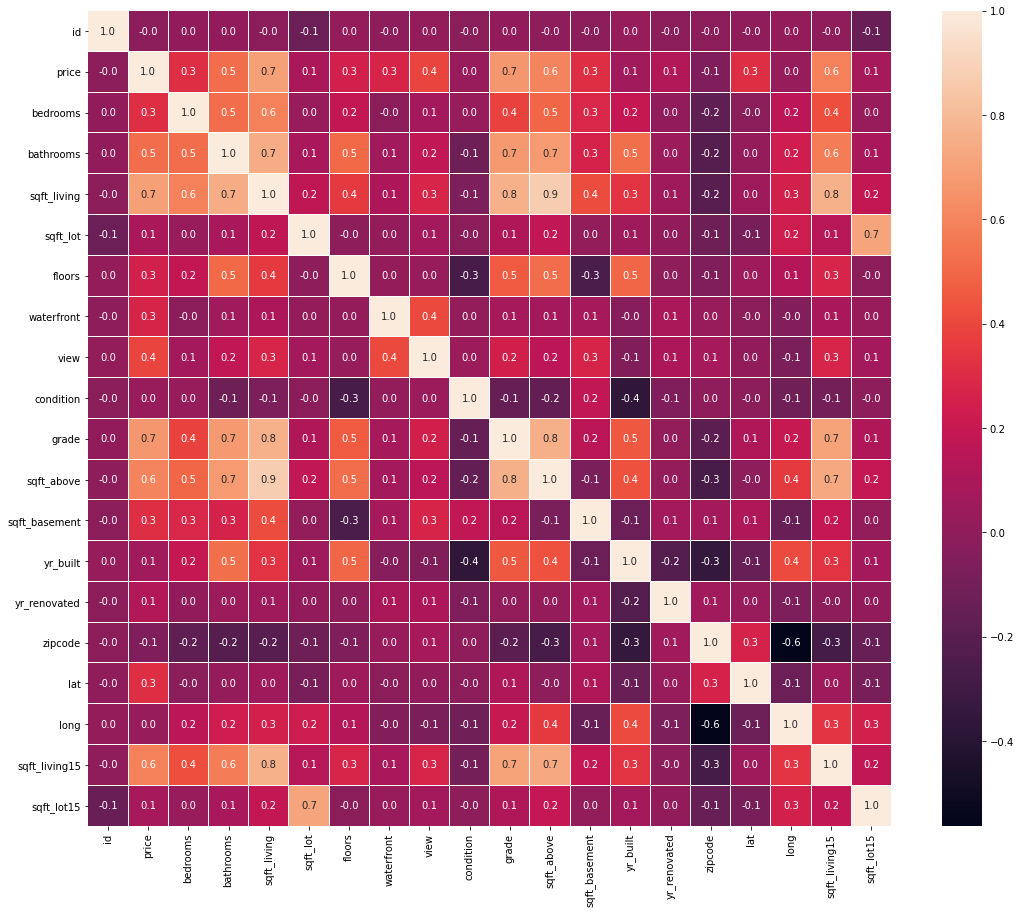

In [49]:
plt.figure(figsize=(18, 15)) #Ajusta o tamanho da figura. Importante saber que o seaborn é baseado em matplotlib.pyplot que 
#foi importado nesse notebook como plt, assim, alterando o tamanho das figuras do matplotlib eu altero o tamanho das figuras#
#do seaborn.
plot = sn.heatmap(corel,  annot = True, fmt='.1f', linewidths=.01)


## Teste da primeira hipotesse geral!
- **O Preço da casa não tem a correlação ρ com a avalição como indicado no heatmap** - Essa afirmação será a nossa hipotesse nula, com nivel de significancia de 0,05.
- **O preço da casa tem a correlação ρ com a avaliação como indicado no heatmap** - Essa será a nossa hipostese alternativa.

consutando a tabela de distribuição de t-student para uma distribuição bicaudal com nivel de significancia de 0,05 e população infinta é de 1,9600

##### Seja o valor que encontramos consultando a tabela de distribuição de t-student dado como  _t=1,9600_, então precisamos calcular _t0_ como: 
$$t0 = ρ \sqrt{(n-2)/(1-ρ^2)}$$ 
- Se o valor _t0_ > _t_ ou _t0_ < _-t_, rejeita-se a hipotese nula. Caso contrario não se rejeita.
- Se a hipotese nula for rejeitada, deve-se concluir que o valor de ρ obtido para a amostra é significante e que existe correlação ρ entre as variaveis analisadas com nivel de significancia de 0,05.
- Se a a hipotese nula não for rejeitada deve-se concluir que o valor obtido de ρ não é significante: tanto pode haver correlação ρ como não haver correlação.

In [50]:
import math
t=1.9600
ρ=0.7
a=21613-2
b=ρ**2
t0 = ρ* math.sqrt((21613-2)/(1-(ρ**2)))
print(t0)
if t0>t or t0<-t:
    print('\nA hipotese nula foi rejeitada e ha correlação entre as variaveis com o nivel de significancia apresentado')
else:
    print('A hipotese nula não foi rejeitada por tanto não se pode admitir ou excluir a existencia de correlação')

144.0954884926019

A hipotese nula foi rejeitada e ha correlação entre as variaveis com o nivel de significancia apresentado


### Por tanto podemos concluir que a hipotese geral de que a avaliação tem influencia direta no preço é verdadeira.
###### Note que, pelo fato da quantidade de individuos na amostra ser alta, certamente os coeficientes de correlação serão todos aprovados em testes de hipotese, esse teste seria mais justificavl se a quantidade de individuos da amostra fossem menores.

## Teste da segunda hipotesse geral!

- A avaliação sofre influencia da quantidade de piso/andares(**_floors_**), da area da casa(**_sqft_living_**), da area externa/terreno(**_sqft_lot_**). Por tanto o preço da casa é influenciado indiretamente por esses campos.
- Aqui precisamos realizar varios testes de hipoteses locais:
     1. Testar se a avaliação da casa sofre influencia direta da quantidade de andares.
     2. Testar se a avaliação da casa sofre influencia direta do valor de area da casa.
     3. Testar se a avaliação da casa sofre influencia direta do valor da area externa/terreno.
     4. Testar se o preço da casa sofre influencia direta da quantidade de andares.
     5. Testar se o preço da casa sofre influencia direta do valor de area da casa.
     6. Testar se o preço da casa sofre influencia direta do valor da area externa/terreno.

###### Teste da preimeira hipotese local
- **A avaliação da casa não tem a correlação ρ com a quantidade de andares** - Essa afirmação será a nossa hipotesse nula, com nivel de significancia de 0,05.
- **A avaliação da casa tem a correlação ρ quantidade de andares** - Essa será a nossa hipostese alternativa.

consutando a tabela de distribuição de t-student para uma distribuição bicaudal com nivel de significancia de 0,05 e população infinta é de 1,9600


In [51]:
import math
t=1.9600
ρ=0.5
a=21613-2
b=ρ**2
t0 = ρ* math.sqrt((21613-2)/(1-(ρ**2)))
print(t0)
if t0>t or t0<-t:
    print('\nA hipotese nula foi rejeitada e ha correlação entre as variaveis com o nivel de significancia apresentado')
else:
    print('A hipotese nula não foi rejeitada por tanto não se pode admitir ou excluir a existencia de correlação')

84.87441703285312

A hipotese nula foi rejeitada e ha correlação entre as variaveis com o nivel de significancia apresentado


Em comentarios anteriores, definimos as faixas de valores para ρ que seriam consideradas sem correlação, com coreelação direta e etc. Para uma correlação entre 0,5 e 0,6 (positivo ou negativo) foi decidido que a correlação é moderada sem influencia direta. Assim, o teste de hipotese apenas confirma que a correlação de 0.5 entre os campos _grade_ e _floors_ com nivel de significancia de 0,05 é aceitavel. Dessa forma, como o ρ = 0,5, dizemos que **a correlação entre _grade_ e _floors_ é moderada e sem influencia direta fato que diverge da segunda hipotese geral e anula a primeira hipotesse local**.

###### Teste da segunda hipotese local
- **A avaliação da casa não tem a correlação ρ com a area da casa** - Essa afirmação será a nossa hipotesse nula, com nivel de significancia de 0,05.
- **A avaliação da casa tem a correlação ρ com a area da casa** - Essa será a nossa hipostese alternativa.

consutando a tabela de distribuição de t-student para uma distribuição bicaudal com nivel de significancia de 0,05 e população infinta é de 1,9600

In [52]:
import math
t=1.9600
ρ=0.8
a=21613-2
b=ρ**2
t0 = ρ* math.sqrt((21613-2)/(1-(ρ**2)))
print(t0)
if t0>t or t0<-t:
    print('\nA hipotese nula foi rejeitada e ha correlação entre as variaveis com o nivel de significancia apresentado')
else:
    print('A hipotese nula não foi rejeitada por tanto não se pode admitir ou excluir a existencia de correlação')

196.00907008492126

A hipotese nula foi rejeitada e ha correlação entre as variaveis com o nivel de significancia apresentado


Em comentarios anteriores, definimos as faixas de valores para ρ que seriam consideradas sem correlação, com coreelação direta e etc. Para uma correlação entre 0,7 e 0,8 (positivo ou negativo) foi decidido que a correlação é forte com influencia direta. Assim, o teste de hipotese apenas confirma que a correlação de 0.8 entre os campos _grade_ e _sqft_living_ com nivel de significancia de 0,05 é aceitavel. Dessa forma, como o ρ = 0,8, dizemos que **a correlação entre _grade_ e _sqft_living_ é forte e com influencia direta, fato que concorda com a segunda hipotese geral e torna a segunda hipotesse local aceitavel**.

###### Teste da terceira hipotese local
- **A avaliação da casa não tem a correlação ρ com a area externa/terreno** - Essa afirmação será a nossa hipotesse nula, com nivel de significancia de 0,05.
- **A avaliação da casa tem a correlação ρ com a area externa/terreno** - Essa será a nossa hipostese alternativa.

consutando a tabela de distribuição de t-student para uma distribuição bicaudal com nivel de significancia de 0,05 e população infinta é de 1,9600

In [53]:
import math
t=1.9600
ρ=0.1
a=21613-2
b=ρ**2
t0 = ρ* math.sqrt((21613-2)/(1-(ρ**2)))
print(t0)
if t0>t or t0<-t:
    print('\nA hipotese nula foi rejeitada e ha correlação entre as variaveis com o nivel de significancia apresentado')
else:
    print('A hipotese nula não foi rejeitada por tanto não se pode admitir ou excluir a existencia de correlação')

14.774739567685424

A hipotese nula foi rejeitada e ha correlação entre as variaveis com o nivel de significancia apresentado


Em comentarios anteriores, definimos as faixas de valores para ρ que seriam consideradas sem correlação, com correlação direta e etc. Para uma correlação entre 0 e 0,1 (positivo ou negativo) foi decidido que não haveria correlação. Assim, o teste de hipotese apenas confirma que a correlação de 0.1 entre os campos _grade_ e _sqft_lot_ com nivel de significancia de 0,05 é aceitavel. Dessa forma, como o ρ = 0,1, dizemos que **a correlação entre _grade_ e _sqft_lot_ é desconsiderada - não há correlação - fato que diverge da segunda hipotese geral e anula a terceira hipotesse local**.

###### Teste da quarta hipotese local
- **O preço da casa não tem a correlação ρ com a quantidade de andares** - Essa afirmação será a nossa hipotesse nula, com nivel de significancia de 0,05.
- **O preço da casa tem a correlação ρ com a quantidade de andares** - Essa será a nossa hipostese alternativa.

consutando a tabela de distribuição de t-student para uma distribuição bicaudal com nivel de significancia de 0,05 e população infinta é de 1,9600

In [54]:
import math
t=1.9600
ρ=0.3
a=21613-2
b=ρ**2
t0 = ρ* math.sqrt((21613-2)/(1-(ρ**2)))
print(t0)
if t0>t or t0<-t:
    print('\nA hipotese nula foi rejeitada e ha correlação entre as variaveis com o nivel de significancia apresentado')
else:
    print('A hipotese nula não foi rejeitada por tanto não se pode admitir ou excluir a existencia de correlação')

46.231500606747

A hipotese nula foi rejeitada e ha correlação entre as variaveis com o nivel de significancia apresentado


Em comentarios anteriores, definimos as faixas de valores para ρ que seriam consideradas sem correlação, com coreelação direta e etc. Para uma correlação entre 0,3 e 0,4 (positivo ou negativo) foi decidido que a correlação é fraca sem influencia direta. Assim, o teste de hipotese apenas confirma que a correlação de 0,3 entre os campos _price_ e _floors_ com nivel de significancia de 0,05 é aceitavel. Dessa forma, como o ρ = 0,3, dizemos que **a correlação entre _price_ e _floors_ é fraca e sem influencia direta fato que concorda com a segunda hipotese geral e anula a quarta hipotesse local**.

###### Teste da quinta hipotese local
- **O preço da casa não tem a correlação ρ com a area da casa** - Essa afirmação será a nossa hipotesse nula, com nivel de significancia de 0,05.
- **O preço da casa tem a correlação ρ com a area da casa** - Essa será a nossa hipostese alternativa.

consutando a tabela de distribuição de t-student para uma distribuição bicaudal com nivel de significancia de 0,05 e população infinta é de 1,9600

In [55]:
import math
t=1.9600
ρ=0.7
a=21613-2
b=ρ**2
t0 = ρ* math.sqrt((21613-2)/(1-(ρ**2)))
print(t0)
if t0>t or t0<-t:
    print('\nA hipotese nula foi rejeitada e ha correlação entre as variaveis com o nivel de significancia apresentado')
else:
    print('A hipotese nula não foi rejeitada por tanto não se pode admitir ou excluir a existencia de correlação')

144.0954884926019

A hipotese nula foi rejeitada e ha correlação entre as variaveis com o nivel de significancia apresentado


Em comentarios anteriores, definimos as faixas de valores para ρ que seriam consideradas sem correlação, com coreelação direta e etc. Para uma correlação entre 0,7 e 0,8 (positivo ou negativo) foi decidido que a correlação é forte com influencia direta. Assim, o teste de hipotese apenas confirma que a correlação de 0,7 entre os campos _price_ e _sqft_living_ com nivel de significancia de 0,05 é aceitavel. Dessa forma, como o ρ = 0,7, dizemos que **a correlação entre _price_ e _sqft_living_ é forte e com influencia direta, fato que discorda com a segunda hipotese geral e torna a quinta hipotesse local aceitavel**.

###### Teste da sexta hipotese local
- **O preço da casa não tem a correlação ρ com a area externa/terreno** - Essa afirmação será a nossa hipotesse nula, com nivel de significancia de 0,05.
- **O preço da casa tem a correlação ρ com a area externa/terreno** - Essa será a nossa hipostese alternativa.

consutando a tabela de distribuição de t-student para uma distribuição bicaudal com nivel de significancia de 0,05 e população infinta é de 1,9600

In [56]:
import math
t=1.9600
ρ=0.1
a=21613-2
b=ρ**2
t0 = ρ* math.sqrt((21613-2)/(1-(ρ**2)))
print(t0)
if t0>t or t0<-t:
    print('\nA hipotese nula foi rejeitada e ha correlação entre as variaveis com o nivel de significancia apresentado')
else:
    print('A hipotese nula não foi rejeitada por tanto não se pode admitir ou excluir a existencia de correlação')

14.774739567685424

A hipotese nula foi rejeitada e ha correlação entre as variaveis com o nivel de significancia apresentado


Em comentarios anteriores, definimos as faixas de valores para ρ que seriam consideradas sem correlação, com correlação direta e etc. Para uma correlação entre 0 e 0,1 (positivo ou negativo) foi decidido que não haveria correlação. Assim, o teste de hipotese apenas confirma que a correlação de 0,1 entre os campos _price_ e _sqft_lot_ com nivel de significancia de 0,05 é aceitavel. Dessa forma, como o ρ = 0,1, dizemos que **a correlação entre _price_ e _sqft_lot_ é desconsiderada - não há correlação - fato que diverge da segunda hipotese geral e anula a sexta hipotesse local**.

###### Assim temos para as hipoteses locais que:
   1. A hipotese que a avaliação da casa sofre influencia direta da quantidade de andares é **falsa** dado o nivel de correlação e o modo como foi decidido interpreta-lo.
   2. A hipotese que a avaliação da casa sofre influencia direta do valor de area da casa é **verdadeira** dado o nivel de correlação e o modo como foi decidido interpreta-lo.
   3. A hipotese que a avaliação da casa sofre influencia direta do valor da area externa/terreno é **falsa** dado o nivel de correlação e o modo como foi decidido interpreta-lo.
   4. A hipotese que o preço da casa sofre influencia direta da quantidade de andares é **falsa** dado o nivel de correlação e o modo como foi decidido interpreta-lo.
   5. A hipotese que o preço da casa sofre influencia direta do valor de area da casaé **verdadeira** dado o nivel de correlação e o modo como foi decidido interpreta-lo.
   6. A hipotese que o preço da casa sofre influencia direta do valor da area externa/terrenoé **falsa** dado o nivel de correlação e o modo como foi decidido interpreta-lo.
   
##### Dessa forma, como esperavamos que as hipoteses locais 1,2 e 3 fossem verdadeiras e as hipotesses 4,5 e 6 fossem falasas para aceitar a segunda hipotesse geral, conclui-se que ela deve ser rejeitada.
##### Concluimos tambem que o _grade_ e o _price_ sofre influencia direta do _sqft_living_. Porém o _floors_ e o _sqft_lot_ não influencia o _price_ nem o _grade_.

## Teste da terceira hipotesse geral!

- O Preço(price) da casa não é influenciado nem de forma direta ou indireta pelo fato de estar em area de praia(waterfront).
- Essa hipotese foi levantada pois é comum que imoveis proximos a area de praia sejam mais caros, porém, podemos observar no heatmap de correlações que o campo _waterfront_ não possui nenhuma correlação maior ou igual a 0,5. Ainda assim, iremos testar a hipotese.

- **O preço da casa não tem a correlação ρ com o fato de estar em area de praia** - Essa afirmação será a nossa hipotesse nula, com nivel de significancia de 0,05.
- **O preço da casa tem a correlação ρ com o fato de estar em area de praia** - Essa será a nossa hipostese alternativa.

consutando a tabela de distribuição de t-student para uma distribuição bicaudal com nivel de significancia de 0,05 e população infinta é de 1,9600

In [57]:
import math
t=1.9600
ρ=0.3
a=21613-2
b=ρ**2
t0 = ρ* math.sqrt((21613-2)/(1-(ρ**2)))
print(t0)
if t0>t or t0<-t:
    print('\nA hipotese nula foi rejeitada e ha correlação entre as variaveis com o nivel de significancia apresentado')
else:
    print('A hipotese nula não foi rejeitada por tanto não se pode admitir ou excluir a existencia de correlação')

46.231500606747

A hipotese nula foi rejeitada e ha correlação entre as variaveis com o nivel de significancia apresentado


Em comentarios anteriores, definimos as faixas de valores para ρ que seriam consideradas sem correlação, com coreelação direta e etc. Para uma correlação entre 0,3 e 0,4 (positivo ou negativo) foi decidido que a correlação é fraca sem influencia direta. Assim, o teste de hipotese apenas confirma que a correlação de 0,3 entre os campos _price_ e _waterfront_ com nivel de significancia de 0,05 é aceitavel. Dessa forma, como o ρ = 0,3, dizemos que **a correlação entre _price_ e _waterfront_ é fraca e sem influencia direta fato que concorda com a terceira hipotese geral**.

## Teste da quarta hipotesse geral!
- O Preço deve ser influenciado de forma direta pela quantidade de banheiros(bathrooms) e quartos(bedrooms), porém a avalição(grade) tem maior influencia sobre o preço que esses campos.
- Aqui precisamos realizar alguns testes de hipoteses locais:
     1. Testar se a quantidade de banheiros tem influencia direta sobre o preço.
     2. Testar se a quantidade de quartos tem influencia direta sobre o preço.
     3. Observar, caso as outras duas hipotesses locais sejam verdadeiras se a avaliação do imovel consegue influenciar o preço mais que a quantidade de banheiros ou quartos.



###### Teste da preimeira hipotese local
- **O preço da casa não tem a correlação ρ com a quantidade de banheiros** - Essa afirmação será a nossa hipotesse nula, com nivel de significancia de 0,05.
- **O preço da casa tem a correlação ρ com a quantidade de banheiros** - Essa será a nossa hipostese alternativa.

consutando a tabela de distribuição de t-student para uma distribuição bicaudal com nivel de significancia de 0,05 e população infinta é de 1,9600


In [58]:
import math
t=1.9600
ρ=0.5
a=21613-2
b=ρ**2
t0 = ρ* math.sqrt((21613-2)/(1-(ρ**2)))
print(t0)
if t0>t or t0<-t:
    print('\nA hipotese nula foi rejeitada e ha correlação entre as variaveis com o nivel de significancia apresentado')
else:
    print('A hipotese nula não foi rejeitada por tanto não se pode admitir ou excluir a existencia de correlação')

84.87441703285312

A hipotese nula foi rejeitada e ha correlação entre as variaveis com o nivel de significancia apresentado


Em comentarios anteriores, definimos as faixas de valores para ρ que seriam consideradas sem correlação, com coreelação direta e etc. Para uma correlação entre 0,5 e 0,6 (positivo ou negativo) foi decidido que a correlação é moderada sem influencia direta. Assim, o teste de hipotese apenas confirma que a correlação de 0.5 entre os campos _price_ e _bathrooms_ com nivel de significancia de 0,05 é aceitavel. Dessa forma, como o ρ = 0,5, dizemos que **a correlação entre _price_ e _bathrooms_ é moderada e sem influencia direta fato que diverge da quarta hipotese geral e anula a primeira hipotesse local**.

###### Teste da preimeira hipotese local
- **O preço da casa não tem a correlação ρ com a quantidade de quartos** - Essa afirmação será a nossa hipotesse nula, com nivel de significancia de 0,05.
- **O preço da casa tem a correlação ρ com a quantidade de quartos** - Essa será a nossa hipostese alternativa.

consutando a tabela de distribuição de t-student para uma distribuição bicaudal com nivel de significancia de 0,05 e população infinta é de 1,9600


In [59]:
import math
t=1.9600
ρ=0.3
a=21613-2
b=ρ**2
t0 = ρ* math.sqrt((21613-2)/(1-(ρ**2)))
print(t0)
if t0>t or t0<-t:
    print('\nA hipotese nula foi rejeitada e ha correlação entre as variaveis com o nivel de significancia apresentado')
else:
    print('A hipotese nula não foi rejeitada por tanto não se pode admitir ou excluir a existencia de correlação')

46.231500606747

A hipotese nula foi rejeitada e ha correlação entre as variaveis com o nivel de significancia apresentado


Em comentarios anteriores, definimos as faixas de valores para ρ que seriam consideradas sem correlação, com coreelação direta e etc. Para uma correlação entre 0,3 e 0,4 (positivo ou negativo) foi decidido que a correlação é fraca sem influencia direta. Assim, o teste de hipotese apenas confirma que a correlação de 0,3 entre os campos _price_ e _bedrooms_ com nivel de significancia de 0,05 é aceitavel. Dessa forma, como o ρ = 0,3, dizemos que **a correlação entre _price_ e _bedrooms_ é fraca e sem influencia direta fato que discorda com a quarta hipotese geral e anula a segunda hipotesse local**.

**Como a priemeira e segunda hipotese local foram rejeitadas temos que a terceira hipotesse local não faz sentido, logo tambem não podemos aceitar a quarta hipotese geral. Além disso podemos apenas concluir que o preço não é influenciado de forma direta pela quantidade de baneiros ou quartos**



## Assim temos para as hipotese gerais que:
1. A hipotese que o Preço(_price_) da casa é influenciado diretamente pela avaliação(_grade_) é **VERDADEIRA**.
2. A hipotese de que a avaliação sofre influencia da quantidade de piso/andares(_floors_), da area da casa(_sqft_living_), da area externa/terreno(_sqft_lot_). Por tanto o preço da casa é influenciado indiretamente por esses campos é **FALSA**. Além disso concluimos que na verdade o _grade_ e o _price_ sofre influencia direta do _sqft_living_. Porém o _floors_ e o _sqft_lot_ não influencia o _price_ nem o _grade_.
3. A hipotese que o Preço(_price_) da casa não é influenciado nem de forma direta ou indireta pelo fato de estar em area de praia é **VERDADEIRA**.
4. A hipotesse que o Preço deve ser influenciado de forma direta pela quantidade de banheiros(_bathrooms_) e quartos(_bedrooms_), porém a avalição(_grade_) tem maior influencia sobre o preço que esses campos é **FALSA**. Além disso podemos apenas concluir que o preço não é influenciado de forma direta pela quantidade de baneiros ou quartos.

- Nem todas as hipoteses eram verdadeiras, porém a analise nos mostrou algo interessante sobre a nossa base de dados, como a influencia da quantidade de banheiros, e quartos, e como a area externa, da casa e a quantidade de andares influencia o preço, nos mostrou tambem que os campos mais imortantes para definir o preço são a area da casa e a avaliação.

- As hipoteses avaliadas até aqui foram propostas antes de ser gerado o heatmap, dessa forma, após analise do heatmap é possivel propor **HIPOSTESES COMPLEMENTARES**:
   1. A quantidade de banheiros tem influencia direta na avaliação.
   2. A area do soltão tem influencia direta na avaliação.
   3. O Ano de construção(yr_build) não tem influencia direta nem na avaliação nem no preço.
   4. O ano de reforma(yr_renovate) não tem influencia direta nem na avaliação nem no preço.

## Teste da primeira hipotesse complementar!

- A quantidade de banheiros(_bathrooms_) tem influencia direta na avaliação(_grade_).
- Essa hipotese foi levantada após observação do heatmap, e por tanto esse teste é mais uma prache para manter a formalização do estudo do que um pesquisa verdadeira.

- **A quantidade de banheiros da casa não tem a correlação ρ com o valor da avaliação(_grade_) do imovel** - Essa afirmação será a nossa hipotesse nula, com nivel de significancia de 0,05.
- **A quantidade de banheiros da casa tem a correlação ρ com o valor da avaliação(_grade_) do imovel** - Essa será a nossa hipostese alternativa.

consutando a tabela de distribuição de t-student para uma distribuição bicaudal com nivel de significancia de 0,05 e população infinta é de 1,9600

In [60]:
import math
t=1.9600
ρ=0.7
a=21613-2
b=ρ**2
t0 = ρ* math.sqrt((21613-2)/(1-(ρ**2)))
print(t0)
if t0>t or t0<-t:
    print('\nA hipotese nula foi rejeitada e ha correlação entre as variaveis com o nivel de significancia apresentado')
else:
    print('A hipotese nula não foi rejeitada por tanto não se pode admitir ou excluir a existencia de correlação')

144.0954884926019

A hipotese nula foi rejeitada e ha correlação entre as variaveis com o nivel de significancia apresentado


Para uma correlação entre 0,7 e 0,8 (positivo ou negativo) foi decidido que a correlação é forte com influencia direta. Assim, o teste de hipotese apenas confirma que a correlação de 0,7 entre os campos _grade_ e _bathrooms_ com nivel de significancia de 0,05 é aceitavel. Dessa forma, como o ρ = 0,7, dizemos que **a correlação entre _grade_ e _bathrooms_ é forte e com influencia direta fato que concorda com a primeira hipotese complementar e a torna aceitavel**.

## Teste da segunda hipotesse complementar!

- A area do soltão(_sqft_above_) tem influencia direta na avaliação(_grade_).
- Essa hipotese foi levantada após observação do heatmap, e por tanto esse teste é mais uma prache para manter a formalização do estudo do que um pesquisa verdadeira.

- **A area do soltão da casa não tem a correlação ρ com o valor da avaliação(_grade_) do imovel** - Essa afirmação será a nossa hipotesse nula, com nivel de significancia de 0,05.
- **A area do soltão da casa tem a correlação ρ com o valor da avaliação(_grade_) do imovel** - Essa será a nossa hipostese alternativa.

consutando a tabela de distribuição de t-student para uma distribuição bicaudal com nivel de significancia de 0,05 e população infinta é de 1,9600

In [61]:
import math
t=1.9600
ρ=0.8
a=21613-2
b=ρ**2
t0 = ρ* math.sqrt((21613-2)/(1-(ρ**2)))
print(t0)
if t0>t or t0<-t:
    print('\nA hipotese nula foi rejeitada e ha correlação entre as variaveis com o nivel de significancia apresentado')
else:
    print('A hipotese nula não foi rejeitada por tanto não se pode admitir ou excluir a existencia de correlação')

196.00907008492126

A hipotese nula foi rejeitada e ha correlação entre as variaveis com o nivel de significancia apresentado


Para uma correlação entre 0,7 e 0,8 (positivo ou negativo) foi decidido que a correlação é forte com influencia direta. Assim, o teste de hipotese apenas confirma que a correlação de 0,8 entre os campos _grade_ e _sqft_above_ com nivel de significancia de 0,05 é aceitavel. Dessa forma, como o ρ = 0,8, dizemos que **a correlação entre _grade_ e _sqft_above_ é forte e com influencia direta fato que concorda com a segunda hipotese complementar e a torna aceitavel**.

## Teste da terceira hipotesse complementar!

- O Ano de construção(yr_build) não tem influencia direta nem na avaliação nem no preço..
- Aqui precisamos realizar dois testes de hipoteses locais:
     1. Testar se a avaliação da casa sofre influencia direta do ano de construção.
     2. Testar se o preço da casa sofre influencia direta do ano de construção.

##### Teste da primeira hipotesse local!

- O Ano de construção(yr_build) tem influencia direta na avaliação.
- Essa hipotese foi levantada após observação do heatmap, e por tanto esse teste é mais uma prache para manter a formalização do estudo do que um pesquisa verdadeira.

- **O ano de construção da casa(_yr_build_) não tem a correlação ρ com o valor da avaliação(_grade_) do imovel** - Essa afirmação será a nossa hipotesse nula, com nivel de significancia de 0,05.
- **O ano de construção da casa(_yr_build_) tem a correlação ρ com o valor da avaliação(_grade_) do imovel** - Essa será a nossa hipostese alternativa.

consutando a tabela de distribuição de t-student para uma distribuição bicaudal com nivel de significancia de 0,05 e população infinta é de 1,9600

In [62]:
import math
t=1.9600
ρ=0.5
a=21613-2
b=ρ**2
t0 = ρ* math.sqrt((21613-2)/(1-(ρ**2)))
print(t0)
if t0>t or t0<-t:
    print('\nA hipotese nula foi rejeitada e ha correlação entre as variaveis com o nivel de significancia apresentado')
else:
    print('A hipotese nula não foi rejeitada por tanto não se pode admitir ou excluir a existencia de correlação')

84.87441703285312

A hipotese nula foi rejeitada e ha correlação entre as variaveis com o nivel de significancia apresentado


Para uma correlação entre 0,5 e 0,6 (positivo ou negativo) foi decidido que a correlação é moderada sem influencia direta. Assim, o teste de hipotese apenas confirma que a correlação de 0,5 entre os campos _grade_ e _yr_build_ com nivel de significancia de 0,05 é aceitavel. Dessa forma, como o ρ = 0,5, dizemos que **a correlação entre _grade_ e _yr_build_ é fraca e sem influencia direta fato que discorda com a primeira hipotese local e concorda com a terceira hipotese complementar**.

##### Teste da segunda hipotesse local!

- O Ano de construção(yr_build) tem influencia direta no preço.
- Essa hipotese foi levantada após observação do heatmap, e por tanto esse teste é mais uma prache para manter a formalização do estudo do que um pesquisa verdadeira.

- **O ano de construção da casa(_yr_build_) não tem a correlação ρ com o preço(_price_) do imovel** - Essa afirmação será a nossa hipotesse nula, com nivel de significancia de 0,05.
- **O ano de construção da casa(_yr_build_) tem a correlação ρ com o preço(_price_) do imovel** - Essa será a nossa hipostese alternativa.

consutando a tabela de distribuição de t-student para uma distribuição bicaudal com nivel de significancia de 0,05 e população infinta é de 1,9600

In [63]:
import math
t=1.9600
ρ=0.1
a=21613-2
b=ρ**2
t0 = ρ* math.sqrt((21613-2)/(1-(ρ**2)))
print(t0)
if t0>t or t0<-t:
    print('\nA hipotese nula foi rejeitada e ha correlação entre as variaveis com o nivel de significancia apresentado')
else:
    print('A hipotese nula não foi rejeitada por tanto não se pode admitir ou excluir a existencia de correlação')

14.774739567685424

A hipotese nula foi rejeitada e ha correlação entre as variaveis com o nivel de significancia apresentado


Para uma correlação entre 0 a 0,2 (positivo ou negativo) foi decidido que não haveria correlação consideravel. Assim, o teste de hipotese apenas confirma que a correlação de 0,1 entre os campos _price_ e _yr_build_ com nivel de significancia de 0,05 é aceitavel. Dessa forma, como o ρ = 0,1, dizemos que **a correlação entre _price_ e _yr_build_ é disconsiderada - não há correlação - fato que discorda com a segunda hipotese local e concorda com a terceira hipotese complementar**.

###### Assim temos para as hipoteses locais que:
   1. A hipotese que a avaliação da casa sofre influencia direta do ano de construção é **falsa** dado o nivel de correlação e o modo como foi decidido interpreta-lo.
   2. A hipotese que o preço da casa sofre influencia direta do ano de construção é **falsa** dado o nivel de correlação e o modo como foi decidido interpreta-lo.
  
  
##### Dessa forma, como esperavamos que as hipoteses locais fossem falasas para aceitar a terceira hipotesse complemntar, conclui-se que ela deve ser aceita.

## Teste da quarta hipotesse complementar!

- O Ano de reforma(yr_renovate) não tem influencia direta nem na avaliação nem no preço..
- Aqui precisamos realizar dois testes de hipoteses locais:
     1. Testar se a avaliação da casa sofre influencia direta do ano de reforma.
     2. Testar se o preço da casa sofre influencia direta do ano de reforma.

##### Teste da primeira hipotesse local!

- O Ano de reforma(yr_renovate) tem influencia direta na avaliação.
- Essa hipotese foi levantada após observação do heatmap, e por tanto esse teste é mais uma prache para manter a formalização do estudo do que um pesquisa verdadeira.

- **O ano de reforma da casa(_yr_renovate_) não tem a correlação ρ com o valor da avaliação(_grade_) do imovel** - Essa afirmação será a nossa hipotesse nula, com nivel de significancia de 0,05.
- **O ano de reforma da casa(_yr_renovate_) tem a correlação ρ com o valor da avaliação(_grade_) do imovel** - Essa será a nossa hipostese alternativa.


In [64]:
import math
t=1.9600
ρ=0.0
a=21613-2
b=ρ**2
t0 = ρ* math.sqrt((21613-2)/(1-(ρ**2)))
print(t0)
if t0>t or t0<-t:
    print('\nA hipotese nula foi rejeitada e ha correlação entre as variaveis com o nivel de significancia apresentado')
else:
    print('A hipotese nula não foi rejeitada por tanto não se pode admitir ou excluir a existencia de correlação')

0.0
A hipotese nula não foi rejeitada por tanto não se pode admitir ou excluir a existencia de correlação


Para uma correlação entre 0 a 0,2 (positivo ou negativo) foi decidido que não haveria correlação consideravel. Assim, o teste de hipotese não consegue confirmar que a correlação de 0 entre os campos _grade_ e _yr_renovate_ com nivel de significancia de 0,05 é aceitavel porém tambem não podemos excluir a relação. Dessa forma, **não foi possivel concluir nada sobre o teste da hipotese**

##### Teste da segunda hipotesse local!

- O Ano de reforma(yr_renovate) tem influencia direta no preço.
- Essa hipotese foi levantada após observação do heatmap, e por tanto esse teste é mais uma prache para manter a formalização do estudo do que um pesquisa verdadeira.

- **O ano de reforma da casa(_yr_renovate_) não tem a correlação ρ com o preço(_price_) do imovel** - Essa afirmação será a nossa hipotesse nula, com nivel de significancia de 0,05.
- **O ano de construção da casa(_yr_renovate_) tem a correlação ρ com o preço(_price_) do imovel** - Essa será a nossa hipostese alternativa.


In [65]:
import math
t=1.9600
ρ=0.1
a=21613-2
b=ρ**2
t0 = ρ* math.sqrt((21613-2)/(1-(ρ**2)))
print(t0)
if t0>t or t0<-t:
    print('\nA hipotese nula foi rejeitada e ha correlação entre as variaveis com o nivel de significancia apresentado')
else:
    print('A hipotese nula não foi rejeitada por tanto não se pode admitir ou excluir a existencia de correlação')

14.774739567685424

A hipotese nula foi rejeitada e ha correlação entre as variaveis com o nivel de significancia apresentado


Para uma correlação entre 0 a 0,2 (positivo ou negativo) foi decidido que não haveria correlação consideravel. Assim, o teste de hipotese apenas confirma que a correlação de 0,1 entre os campos _price_ e _yr_renovate_ com nivel de significancia de 0,05 é aceitavel. Dessa forma, como o ρ = 0,1, dizemos que **a correlação entre _price_ e _yr_renovate_ é disconsiderada - não há correlação - fato que discorda com a segunda hipotese local e concorda com a quarta hipotese complementar**.

###### Assim temos para as hipoteses locais que:
   1. A hipotese que a avaliação da casa sofre influencia direta do ano de reforma é ainda uma icognita, pois não foi possivel provar que a correlação do heatmap é verdadeira.
   2. A hipotese que o preço da casa sofre influencia direta do ano de reforma é **falsa** dado o nivel de correlação e o modo como foi decidido interpreta-lo.
  
  
##### Dessa forma, como esperavamos que as hipoteses locais fossem falsas para aceitar a terceira hipotesse complemntar, não foi possivel concluir se a hipotesse complementar é ou não aceitavel. Contudo, como buscamos entender nesse estudo quais os campos mais influentes e já temos certeza sobre as relações dos outros campos avaliados, por isso vamos apenas desconsiderar uma possivel relação entre a avaliação e o ano de reforma, visto que, mesmo que existisse, seria uma influencia indireta sobre o preço, que é o campo que buscamos entender de verdade, e a relação entre preço e ano de reforma foi possivel provar e concluir que é desconsideravel.

## Assim temos para as hipoteses complementares que:
1. A hipotese que a quantidade de banheiros tem influencia direta na avaliação é **verdadeira**.
2. A hipotese que a area do soltão tem influencia direta na avaliação é **verdadeira**.
3. A hipotese que o ano de construção(yr_build) não tem influencia direta nem na avaliação nem no preço é **verdadeira**.
4. A hipotese que o ano de reforma(yr_renovate) não tem influencia direta nem na avaliação nem no preço é **verdadeira**.

- Logo observamos que todas as hipoteses complementares foram dadas como verdadeiras, isso ocorre principlamente porque essas hipoteses foram levantadas após analisarmos o heatmap de correlações. Contudo é possivel observar que dentre as hipoteses locais da quarta hipotesse complementar houve um comportamento inesperado - a hipotese não foi rejeitada com esperado - que tornou o resultado naquele instante inconclusivo, mas ainda sem grandes prejuizos ao estudo já estavamos tratando de uma influencia indireta a variavel de real interesse, e por mostramos com certeza a falta de relação direta com essa variavel de interesse que é o preço.

### Conclusões e proximos passos

- Até esse ponto no estudo observamos descrições estatisticas dos nossos dados, a exuistencia de oultiliers que form retirados e o comportamento dos dados sem esse oultiliers, levantamos hipoteses a respeito da nossa base e testamos hipoteses a gerar as seguintes conclusões:
    1. O preço da casa é influenciado diretamente pela avaliação(_grade_) e pela area da casa (_sqft_living_).
    2. A avaliação é inlfuenciada diretamente pela area da casa(_sqft_living_), da area do soltão(_sqft_above_) e pela quantidade de banheiros(_bathrooms_).
    3. Pelo conhecimento sobre a area de negocio era esperado que o preço ou a avaliação sofrencia influencia dirta do ano de construção ou de reforma, da quantidade de andares, de banheiros, e da area externa do imovel, além do fato de estar ou não em area de praia. Porém isso não se confirmou com o estudo feito sobre a base de dados.
    4. É possivel concluir desse estudo, que com o objetivo de lucrar com os imoveis, seria interesante para a empresa comprar imoveis com uma avaliação mais baixa e investisse em aumentar a rea da casa, do soltão ou a quantidade de banheiros, visto que pelo estudo esses campos influenciam na avliação e por consequencia no preço.
 
 
 
- Nos proximos passos do estudo seria interessante buscar por faixas de area da casa e do soltão, e quantidade de banheiros que torne interessante a compra por estar em um ponto onde pequenas reformas aumentem bastante o valor do imovel. Para isso, precisamos gerar graficos que comparem:
    1. A curva preço(_price_) por area da casa(_sqft_living).
    2. A curva preço(_price_) por avaliação(_grade_).
    3. A curva avaliação(_grade_) por area da casa(_sqft_living_).
    4. A curva avaliação(_grade_) por area do soltão(_sqft_above_).
    5. A curva avaliação(_grade_) pela quantidade de banehiros(_bathrooms_).